# Importação de base de dados

In [8]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import InputLayer, Dense


import matplotlib.pyplot as plt

In [9]:
TRN_X = pd.read_csv('TRN_X.csv')
TRN_Y = pd.read_csv('TRN_Y.csv')

TST_X = pd.read_csv('TST_X.csv')
TST_Y = pd.read_csv('TST_Y.csv')

In [10]:
TRN_X.fillna(0, inplace=True)
TRN_Y.fillna(0, inplace=True)

In [11]:
TRN_X.head()

,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,bMaxPrice,...,onlineStatus_ausente,onlineStatus_n,onlineStatus_y,availability_ausente,availability_completely not determinable,availability_completely not orderable,availability_completely orderable,availability_mainly not orderable,availability_mainly orderable,availability_mixed
0,0.26087,0.0,0.001848,0.005,0.009998,0.008570,0.000518,0.009259,0.008570,0.008570,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.26087,0.0,0.004378,0.000,0.012020,0.022521,0.009475,0.000000,0.012349,0.016941,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.26087,0.0,0.015830,0.055,0.001665,0.004284,0.000950,0.018519,0.001427,0.004284,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.26087,0.0,0.001984,0.020,0.000832,0.000713,0.000172,0.009259,0.000713,0.000713,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.26087,0.0,0.130493,0.225,0.002165,0.025707,0.009450,0.037037,0.002856,0.003979,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
# size of TRN_Y
TRN_Y.loc['1', TRN_Y.columns] = 1

# Classificador Random Forest


NÚMERO DO SPLIT: 1


/tmp/ipykernel_5736/3458431425.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RCF.fit(X_train, y_train)


Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  3139  4511
0  3061  5789
Acuracia: 0.5410909090909091
Precisão: 0.5062903225806452
Sensibilidade: 0.4103267973856209
Especificidade: 0.6541242937853108
Área sob a curva ROC: 0.5322255455854658


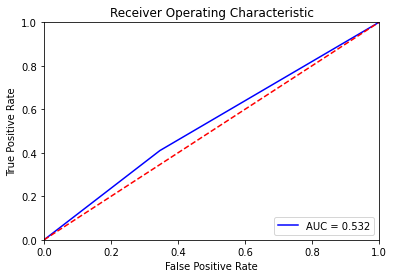


NÚMERO DO SPLIT: 2


/tmp/ipykernel_5736/3458431425.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RCF.fit(X_train, y_train)


Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  3139  4511
0  3061  5789
Acuracia: 0.5410909090909091
Precisão: 0.5062903225806452
Sensibilidade: 0.4103267973856209
Especificidade: 0.6541242937853108
Área sob a curva ROC: 0.5322255455854658


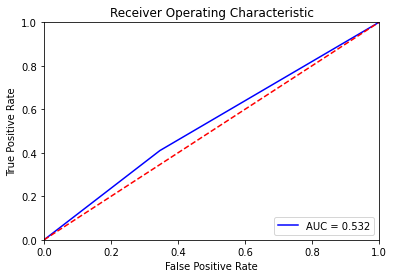


NÚMERO DO SPLIT: 3


/tmp/ipykernel_5736/3458431425.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RCF.fit(X_train, y_train)


Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  3139  4511
0  3061  5789
Acuracia: 0.5410909090909091
Precisão: 0.5062903225806452
Sensibilidade: 0.4103267973856209
Especificidade: 0.6541242937853108
Área sob a curva ROC: 0.5322255455854658


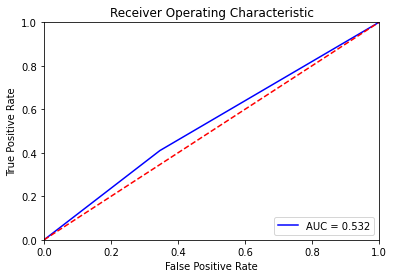


NÚMERO DO SPLIT: 4


/tmp/ipykernel_5736/3458431425.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RCF.fit(X_train, y_train)


Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  3139  4511
0  3061  5789
Acuracia: 0.5410909090909091
Precisão: 0.5062903225806452
Sensibilidade: 0.4103267973856209
Especificidade: 0.6541242937853108
Área sob a curva ROC: 0.5322255455854658


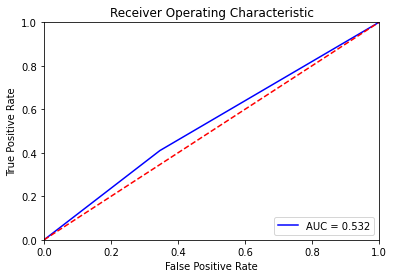


NÚMERO DO SPLIT: 5


/tmp/ipykernel_5736/3458431425.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RCF.fit(X_train, y_train)


Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  3139  4511
0  3061  5789
Acuracia: 0.5410909090909091
Precisão: 0.5062903225806452
Sensibilidade: 0.4103267973856209
Especificidade: 0.6541242937853108
Área sob a curva ROC: 0.5322255455854658


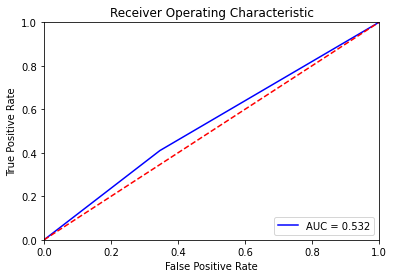


NÚMERO DO SPLIT: 6


/tmp/ipykernel_5736/3458431425.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RCF.fit(X_train, y_train)


Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  3139  4511
0  3061  5789
Acuracia: 0.5410909090909091
Precisão: 0.5062903225806452
Sensibilidade: 0.4103267973856209
Especificidade: 0.6541242937853108
Área sob a curva ROC: 0.5322255455854658


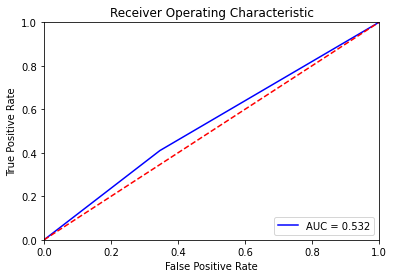


NÚMERO DO SPLIT: 7


/tmp/ipykernel_5736/3458431425.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RCF.fit(X_train, y_train)


Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  3139  4511
0  3061  5789
Acuracia: 0.5410909090909091
Precisão: 0.5062903225806452
Sensibilidade: 0.4103267973856209
Especificidade: 0.6541242937853108
Área sob a curva ROC: 0.5322255455854658


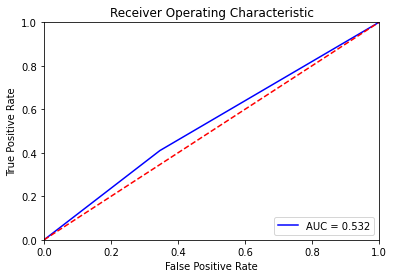


NÚMERO DO SPLIT: 8


/tmp/ipykernel_5736/3458431425.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RCF.fit(X_train, y_train)


Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  3139  4511
0  3061  5789
Acuracia: 0.5410909090909091
Precisão: 0.5062903225806452
Sensibilidade: 0.4103267973856209
Especificidade: 0.6541242937853108
Área sob a curva ROC: 0.5322255455854658


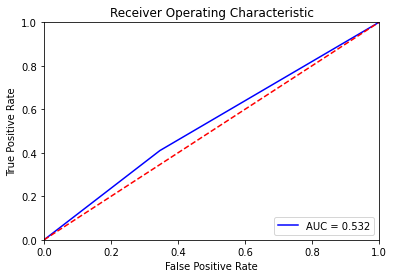


NÚMERO DO SPLIT: 9


/tmp/ipykernel_5736/3458431425.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RCF.fit(X_train, y_train)


Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  3139  4511
0  3061  5789
Acuracia: 0.5410909090909091
Precisão: 0.5062903225806452
Sensibilidade: 0.4103267973856209
Especificidade: 0.6541242937853108
Área sob a curva ROC: 0.5322255455854658


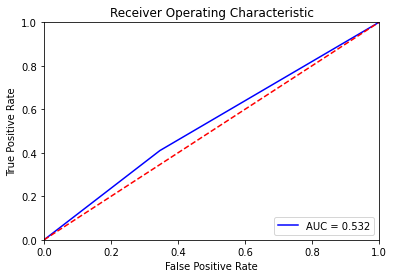


NÚMERO DO SPLIT: 10


/tmp/ipykernel_5736/3458431425.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RCF.fit(X_train, y_train)


Matriz de Confusão (linhas = real | colunas = previsto):
       1     0
1  3139  4511
0  3061  5789
Acuracia: 0.5410909090909091
Precisão: 0.5062903225806452
Sensibilidade: 0.4103267973856209
Especificidade: 0.6541242937853108
Área sob a curva ROC: 0.5322255455854658


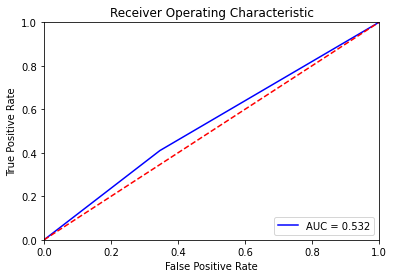

In [13]:
#Classificador Random Forest

RCF = RandomForestClassifier(n_estimators=100, max_features=10, random_state=42)

X = TRN_X
y = TRN_Y

kf = KFold(n_splits=10, random_state=42, shuffle=True)
split_num = 1
for train_index, test_index in kf.split(X):
    print("\nNÚMERO DO SPLIT:", split_num)
    split_num += 1
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    RCF.fit(X_train, y_train)

    y_pred = RCF.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm)

    df_cm = df_cm[[1, 0]]
    df_cm = df_cm.sort_index( ascending = False )
    print("Matriz de Confusão (linhas = real | colunas = previsto):\n", df_cm)

    # Verdadeiro positivo
    a = df_cm.iloc[0,0]
    # Falso positivo
    b = df_cm.iloc[1,0]
    # Falso negativo
    c = df_cm.iloc[0, 1]
    # Verdadeiro negativo
    d = df_cm.iloc[1, 1]

    # Calculando a acurácia do modelo
    acuracia = (a + d) / (a + b + c + d)
    print("Acuracia:", acuracia)

    # Calculando a precisão do modelo
    precisao = a / (a + b)
    print("Precisão:", precisao)

    # Calculando a sensibilidade do modelo
    sensibilidade = a / (a + c)
    print("Sensibilidade:", sensibilidade)

    # Calculando a especificidade do modelo
    especificidade = d / (b + d)
    print("Especificidade:", especificidade)

    # Calculando a área sob a curva ROC
    roc_auc = roc_auc_score(y_test, y_pred)
    print("Área sob a curva ROC:", roc_auc)

    # Gerando o gráfico da área sob a curva ROC
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

##Gerando a base de predição
RC_y_pred= RCF.predict(TRN_X)

##Salvando o modelo de predição
path = 'data'
if not os.path.exists(path):
    os.mkdir(path)
    
DF_RC_y_pred = pd.DataFrame(RC_y_pred)
DF_RC_y_pred.to_csv(f"{path}/predicted_y", sep=',', encoding='utf-8', index=False)

In [14]:
# Classificador Rede Neural MLP

input_neuron, hidden_neuron, output_neuron = X.shape[-1], X.shape[-1]*3, 1

mlp = Sequential([
    InputLayer(input_neuron),
    Dense(hidden_neuron, activation="relu"),
    Dense(output_neuron, activation="sigmoid")
])

mlp.summary()

mlp.compile(optimizer="adam", loss="binary_crossentropy")

X = TRN_X
y = TRN_Y

kf = KFold(n_splits=10, random_state=42, shuffle=True)
split_num = 1
for train_index, test_index in kf.split(X):
    print("\nNÚMERO DO SPLIT:", split_num)
    split_num += 1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    batch_size = 8
    Log = mlp.fit(X_train, y_train, batch_size=batch_size, epochs=50, shuffle=False)

    fig, ax = plt.subplots()
    ax.plot(Log.history["loss"],'r', marker='.', label="Erro no treinamento")
    ax.legend()
    plt.show()

    y_pred = mlp.predict(X_test)

    cm = confusion_matrix(y_test, np.round(abs(y_pred)))
    df_cm = pd.DataFrame(cm)

    df_cm = df_cm[[1, 0]]
    df_cm = df_cm.sort_index( ascending = False )
    print("Matriz de Confusão (linhas = real | colunas = previsto):\n", df_cm)

    # Verdadeiro positivo
    a = df_cm.iloc[0,0]
    # Falso positivo
    b = df_cm.iloc[1,0]
    # Falso negativo
    c = df_cm.iloc[0, 1]
    # Verdadeiro negativo
    d = df_cm.iloc[1, 1]

    # Calculando a acurácia do modelo
    acuracia = (a + d) / (a + b + c + d)
    print("Acuracia:", acuracia)

    # Calculando a precisão do modelo
    precisao = a / (a + b)
    print("Precisão:", precisao)

    # Calculando a sensibilidade do modelo
    sensibilidade = a / (a + c)
    print("Sensibilidade:", sensibilidade)

    # Calculando a especificidade do modelo
    especificidade = d / (b + d)
    print("Especificidade:", especificidade)

    # Calculando a área sob a curva ROC
    roc_auc = roc_auc_score(y_test, y_pred)
    print("Área sob a curva ROC:", roc_auc)

    ##Gerando o gráfico da área sob a curva ROC
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

##Gerando a base de predição
Log_y_pred = mlp.predict(TRN_X)

##Salvando o modelo de predição
path = 'data'
if not os.path.exists(path):
    os.mkdir(path)

DF_Log_y_pred = pd.DataFrame(np.round(abs(Log_y_pred)))
DF_Log_y_pred.to_csv(f"{path}/session_predict_y", sep=',', encoding='utf-8')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 96)                3168      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 97        
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________

NÚMERO DO SPLIT: 1
Epoch 1/50
5625/5625 [==============================] - 23s 4ms/step - loss: 0.6812
Epoch 2/50
5625/5625 [==============================] - 33s 6ms/step - loss: 0.6807
Epoch 3/50
5625/5625 [==============================] - 20s 4ms/step - loss: 0.6806
Epoch 4/50
5625/5625 [==============================] - 31s 6ms/step - loss: 0.6802
Epoch 5/50
5625/5625 [==============================] - 25s 4ms/step - loss: 0.6800
Epoch 6/50
 598/5625 [==>...........................] - ETA: 25s - loss: 0